<a href="https://colab.research.google.com/github/KKuubaaaC/ML_test/blob/main/pytorch_object_deetction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalujemy bibliotekę, która ułatwi nam ewaluację modelu
!pip install torchmetrics -q
!pip install pycocotools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00


In [ ]:
import os
#from google.colab import drive

# Montujemy Dysk Google
drive.mount('/content/drive')

# Definiujemy ścieżki do naszych danych
# Upewnij się, że te ścieżki są dokładnie takie same jak na Twoim Dysku
IMAGES_PATH = '/content/drive/MyDrive/my-detector/dataset/images'
ANNOTATIONS_PATH = '/content/drive/MyDrive/my-detector/dataset/voc_xml'

# Prosty test, aby sprawdzić, czy mamy dostęp do folderów
# i ile plików się w nich znajduje
print(f"Znaleziono {len(os.listdir(IMAGES_PATH))} obrazów w folderze images.")
print(f"Znaleziono {len(os.listdir(ANNOTATIONS_PATH))} adnotacji w folderze annotations.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Znaleziono 50 obrazów w folderze images.
Znaleziono 50 adnotacji w folderze annotations.


Wybrany obraz: object_img051.jpg
Wybrana adnotacja: object_img051.xml

Znaleziona klasa: 'object' ze współrzędnymi: (270, 102), (427, 219)


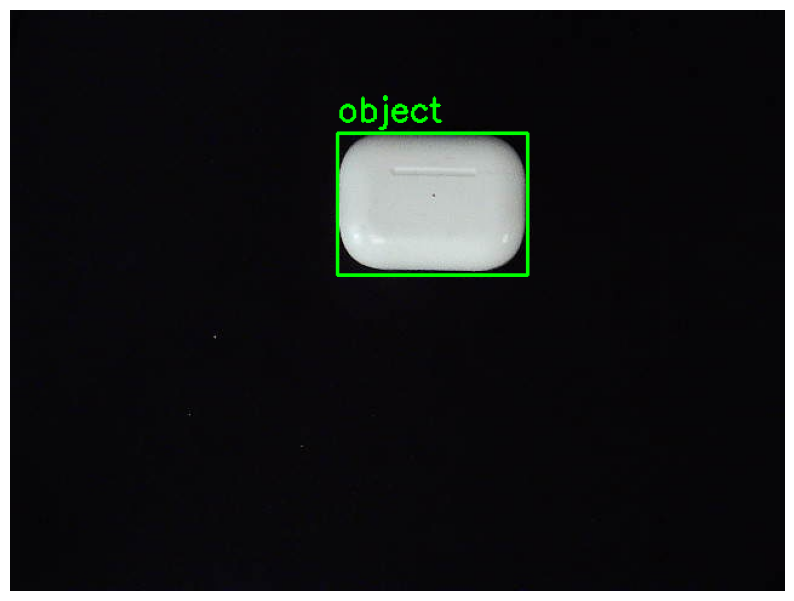

In [ ]:
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import random

# Pobieramy listy plików
image_files = sorted(os.listdir(IMAGES_PATH))
annotation_files = sorted(os.listdir(ANNOTATIONS_PATH))

# Wybieramy losowy indeks, aby zwizualizować przykład
random_index = random.randint(0, len(image_files) - 1)
selected_image_name = image_files[random_index]
# Zakładamy, że plik XML ma taką samą nazwę (bez rozszerzenia) jak plik JPG
selected_annotation_name = selected_image_name.replace('.jpg', '.xml')

# Pełne ścieżki do plików
image_path = os.path.join(IMAGES_PATH, selected_image_name)
annotation_path = os.path.join(ANNOTATIONS_PATH, selected_annotation_name)

print(f"Wybrany obraz: {selected_image_name}")
print(f"Wybrana adnotacja: {selected_annotation_name}\n")

# Parsowanie pliku XML
tree = ET.parse(annotation_path)
root = tree.getroot()

# Wyciągamy współrzędne ramki (bounding box)
for member in root.findall('object'):
    class_name = member.find('name').text

    # Współrzędne ramki
    xmin = int(member.find('bndbox').find('xmin').text)
    ymin = int(member.find('bndbox').find('ymin').text)
    xmax = int(member.find('bndbox').find('xmax').text)
    ymax = int(member.find('bndbox').find('ymax').text)

    print(f"Znaleziona klasa: '{class_name}' ze współrzędnymi: ({xmin}, {ymin}), ({xmax}, {ymax})")

# Wczytujemy obraz za pomocą OpenCV
image = cv2.imread(image_path)
# Konwertujemy kolory z BGR (standard OpenCV) na RGB (standard matplotlib)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Rysujemy prostokąt na obrazie
cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color=(0, 255, 0), thickness=2)
# Dodajemy tekst z nazwą klasy
cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Wyświetlamy obraz
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split

# --- Część 1: Definicja mapowania klas ---
# Tworzymy mapowanie nazw klas na liczby całkowite.
# 0 jest zarezerwowane dla tła, więc nasza pierwsza klasa ma numer 1.
CLASS_NAMES = ["__background__", "object"]
# Tworzymy słownik dla łatwego dostępu
class_map = {name: i for i, name in enumerate(CLASS_NAMES)}

# --- Część 2: Definicja niestandardowej klasy Dataset ---
class ObjectDetectionDataset(Dataset):
    def __init__(self, image_paths, annotation_paths, class_map, transforms=None):
        super().__init__()
        self.image_paths = image_paths
        self.annotation_paths = annotation_paths
        self.class_map = class_map
        self.transforms = transforms

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        annotation_path = self.annotation_paths[idx]

        # Wczytujemy obraz
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Parsujemy adnotacje XML
        tree = ET.parse(annotation_path)
        root = tree.getroot()

        boxes = []
        labels = []

        for member in root.findall('object'):
            class_name = member.find('name').text

            # Konwertujemy nazwę klasy na jej numeryczny odpowiednik
            label = self.class_map[class_name]

            xmin = int(member.find('bndbox').find('xmin').text)
            ymin = int(member.find('bndbox').find('ymin').text)
            xmax = int(member.find('bndbox').find('xmax').text)
            ymax = int(member.find('bndbox').find('ymax').text)

            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(label)

        # Konwertujemy listy na tensory PyTorch
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        # Tworzymy słownik "target", zgodnie z wymaganiami modeli torchvision
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels

        # Stosujemy transformacje (augmentacje), jeśli są zdefiniowane
        if self.transforms:
            # W przyszłości dodamy tu transformacje z biblioteki Albumentations
            # Na razie konwertujemy obraz do tensora
            image = torch.as_tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0

        return image, target

# --- Część 3: Przygotowanie i podział danych ---
# Tworzymy pełne ścieżki do plików
image_filenames = sorted(os.listdir(IMAGES_PATH))
all_image_paths = [os.path.join(IMAGES_PATH, fname) for fname in image_filenames]
all_annotation_paths = [os.path.join(ANNOTATIONS_PATH, fname.replace('.jpg', '.xml')) for fname in image_filenames]

# Dzielimy dane na zbiór treningowy i walidacyjny (np. 80% trening, 20% walidacja)
train_img_paths, val_img_paths, train_ann_paths, val_ann_paths = train_test_split(
    all_image_paths, all_annotation_paths, test_size=0.2, random_state=42
)

# --- Część 4: Utworzenie instancji Dataset ---
# Na razie bez transformacji (dodamy je później)
train_dataset = ObjectDetectionDataset(train_img_paths, train_ann_paths, class_map, transforms=True)
val_dataset = ObjectDetectionDataset(val_img_paths, val_ann_paths, class_map, transforms=True)

print(f"Rozmiar zbioru treningowego: {len(train_dataset)}")
print(f"Rozmiar zbioru walidacyjnego: {len(val_dataset)}")

# Sprawdźmy jedną próbkę z naszego datasetu
img, tgt = train_dataset[0]
print("\nPrzykładowa próbka z Datasetu:")
print("Kształt tensora obrazu:", img.shape)
print("Typ danych tensora obrazu:", img.dtype)
print("Zawartość targetu:", tgt)

Rozmiar zbioru treningowego: 40
Rozmiar zbioru walidacyjnego: 10

Przykładowa próbka z Datasetu:
Kształt tensora obrazu: torch.Size([3, 480, 640])
Typ danych tensora obrazu: torch.float32
Zawartość targetu: {'boxes': tensor([[229., 142., 386., 259.]]), 'labels': tensor([1])}


In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# --- Część 1: Ładowanie wstępnie wytrenowanego modelu ---
# Wybieramy model Faster R-CNN z kręgosłupem ResNet-50 i nowoczesną architekturą FPN
# pretrained=True oznacza, że ładujemy wagi wytrenowane na zbiorze COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')

# --- Część 2: Modyfikacja głowicy klasyfikacyjnej ---
# Pobieramy liczbę cech wejściowych dla klasyfikatora
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Pobieramy liczbę klas z naszej mapy (wliczając tło)
num_classes = len(CLASS_NAMES)

# Podmieniamy starą głowicę na nową, dostosowaną do naszej liczby klas
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# --- Część 3: Przeniesienie modelu na GPU (jeśli dostępne) ---
# Sprawdzamy, czy w naszym środowisku Colab jest dostępne GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

print("Model został pomyślnie załadowany i zmodyfikowany.")
print(f"Model został przeniesiony na urządzenie: {device}")

# Opcjonalnie: wyświetlmy strukturę głowicy, aby zobaczyć naszą zmianę
print("\nStruktura zmodyfikowanej głowicy klasyfikacyjnej:")
print(model.roi_heads.box_predictor)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 180MB/s]


Model został pomyślnie załadowany i zmodyfikowany.
Model został przeniesiony na urządzenie: cuda

Struktura zmodyfikowanej głowicy klasyfikacyjnej:
FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=2, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=8, bias=True)
)


In [ ]:
# Potrzebujemy specjalnej funkcji do obsługi wsadów o różnej liczbie obiektów
def collate_fn(batch):
    return tuple(zip(*batch))

# Tworzymy DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Definiujemy optymalizator
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.001)

# Liczba epok treningu
num_epochs = 20

print("Rozpoczynamy trening...")
print("---------------------------------")

for epoch in range(num_epochs):
    # --- Faza treningu ---
    model.train()
    total_train_loss = 0

    for images, targets in train_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_train_loss += losses.item()

    avg_train_loss = total_train_loss / len(train_loader)

    # --- Faza walidacji ---
    model.eval()

    # UWAGA: POPRAWKA JEST TUTAJ.
    # W trybie ewaluacji model zwraca predykcje, a nie straty.
    # Na razie po prostu przeiterujemy przez dane walidacyjne,
    # aby upewnić się, że pętla działa. W przyszłości dodamy tu obliczanie metryki mAP.
    with torch.no_grad():
        for images, targets in val_loader:
            # Po prostu upewniamy się, że możemy wykonać predykcję
            images = list(image.to(device) for image in images)
            _ = model(images) # Znak '_' oznacza, że ignorujemy wynik

    # Ponieważ nie liczymy straty walidacyjnej, będziemy drukować tylko treningową
    print(f"Epoka {epoch+1}/{num_epochs} | Strata treningowa: {avg_train_loss:.4f}")

print("---------------------------------")
print("Trening zakończony!")

Rozpoczynamy trening...
---------------------------------
Epoka 1/20 | Strata treningowa: 2.7764
Epoka 2/20 | Strata treningowa: 0.1819
Epoka 3/20 | Strata treningowa: 0.3637
Epoka 4/20 | Strata treningowa: 0.2605
Epoka 5/20 | Strata treningowa: 0.3656
Epoka 6/20 | Strata treningowa: 0.3402
Epoka 7/20 | Strata treningowa: 0.1460
Epoka 8/20 | Strata treningowa: 0.1054
Epoka 9/20 | Strata treningowa: 0.0850
Epoka 10/20 | Strata treningowa: 0.0648
Epoka 11/20 | Strata treningowa: 0.0496
Epoka 12/20 | Strata treningowa: 0.0479
Epoka 13/20 | Strata treningowa: 0.0422
Epoka 14/20 | Strata treningowa: 0.0351
Epoka 15/20 | Strata treningowa: 0.0231
Epoka 16/20 | Strata treningowa: 0.0319
Epoka 17/20 | Strata treningowa: 0.0384
Epoka 18/20 | Strata treningowa: 0.0452
Epoka 19/20 | Strata treningowa: 0.0328
Epoka 20/20 | Strata treningowa: 0.0280
---------------------------------
Trening zakończony!


Wykryto 'object' z pewnością 0.9885 na pozycji [ 62.596954 325.7105   209.57613  439.6383  ]


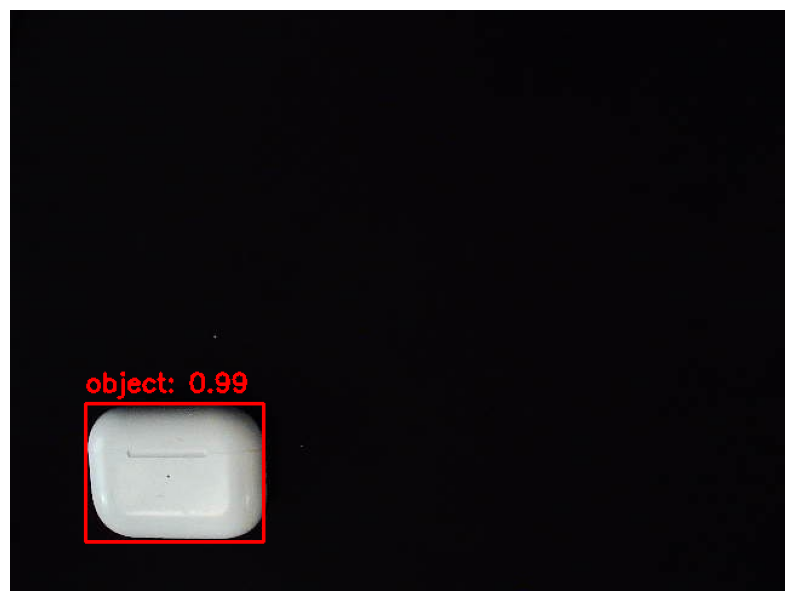

In [ ]:
# Wybieramy losowy obraz ze zbioru walidacyjnego
img, target = val_dataset[random.randint(0, len(val_dataset) - 1)]

# Ustawiamy model w tryb ewaluacji
model.eval()

# Wykonujemy inferencję
with torch.no_grad():
    # Dodajemy wymiar "batcha" (bo model oczekuje wsadu obrazów) i przenosimy na GPU
    prediction = model([img.to(device)])

# Wynik przenosimy z powrotem na CPU do dalszej obróbki
pred_boxes = prediction[0]['boxes'].cpu().numpy()
pred_scores = prediction[0]['scores'].cpu().numpy()
pred_labels_idx = prediction[0]['labels'].cpu().numpy()

# Konwertujemy obraz z tensora z powrotem do formatu, który można wyświetlić
# (un-normalizujemy i zmieniamy kolejność wymiarów)
img_display = np.array(img.permute(1, 2, 0) * 255, dtype=np.uint8)
# Kopiujemy, aby oryginał został bez zmian
img_with_boxes = img_display.copy()

# Rysujemy tylko te ramki, których pewność (score) jest powyżej progu
CONFIDENCE_THRESHOLD = 0.5

for i, box in enumerate(pred_boxes):
    score = pred_scores[i]
    if score > CONFIDENCE_THRESHOLD:
        xmin, ymin, xmax, ymax = box.astype(int)
        label_idx = pred_labels_idx[i]
        label_name = CLASS_NAMES[label_idx]

        print(f"Wykryto '{label_name}' z pewnością {score:.4f} na pozycji {box}")

        # Rysujemy ramkę
        cv2.rectangle(img_with_boxes, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        # Rysujemy etykietę
        cv2.putText(img_with_boxes, f"{label_name}: {score:.2f}", (xmin, ymin - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# Wyświetlamy wynik
plt.figure(figsize=(10, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()

Model został pomyślnie zapisany w lokalizacji: /content/drive/MyDrive/my-detector/models/object_detector_model.pth


In [ ]:
# 1. Zdefiniuj tę samą architekturę modelu
model_reloaded = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=None) # weights=None, bo załadujemy własne
in_features = model_reloaded.roi_heads.box_predictor.cls_score.in_features
num_classes = 2 # Pamiętaj o tle
model_reloaded.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# 2. Załaduj zapisane wagi
model_path = '/content/drive/MyDrive/my-detector/models/object_detector_model.pth'
model_reloaded.load_state_dict(torch.load(model_path))

# 3. Przenieś na GPU i ustaw w tryb ewaluacji
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model_reloaded.to(device)
model_reloaded.eval()

# Teraz model_reloaded jest gotowy do inferencji!

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
import time

# Potrzebujemy specjalnej funkcji do obsługi wsadów o różnej liczbie obiektów
def collate_fn(batch):
    return tuple(zip(*batch))

# Tworzymy DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Definiujemy optymalizator
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.Adam(params, lr=0.001)

# Liczba epok treningu
num_epochs = 20

# --- NOWOŚĆ: Ścieżka do zapisu najlepszego modelu ---
MODEL_SAVE_PATH = '/content/drive/MyDrive/my-detector/models'
os.makedirs(MODEL_SAVE_PATH, exist_ok=True)
BEST_MODEL_PATH = os.path.join(MODEL_SAVE_PATH, 'best_object_detector_model.pth')

# --- NOWOŚĆ: Zmienna do śledzenia najlepszej straty walidacyjnej ---
best_val_loss = float('inf')

print("Rozpoczynamy trening...")
print("---------------------------------")

start_time = time.time()

for epoch in range(num_epochs):
    # --- Faza treningu ---
    model.train()
    total_train_loss = 0

    for images, targets in train_loader:
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_train_loss += losses.item()

    avg_train_loss = total_train_loss / len(train_loader)

    # --- Faza walidacji ---
    model.train() # UWAGA: Celowo ustawiamy model w tryb .train() do obliczenia straty
    total_val_loss = 0

    with torch.no_grad():
        for images, targets in val_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Obliczamy straty na zbiorze walidacyjnym
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_val_loss += losses.item()

    avg_val_loss = total_val_loss / len(val_loader)

    print(f"Epoka {epoch+1}/{num_epochs} | Strata treningowa: {avg_train_loss:.4f} | Strata walidacyjna: {avg_val_loss:.4f}")

    # --- NOWOŚĆ: Logika zapisywania najlepszego modelu ---
    if avg_val_loss < best_val_loss:
        print(f"Nowa najlepsza strata walidacyjna: {avg_val_loss:.4f} (poprzednia: {best_val_loss:.4f}). Zapisuję model!")
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), BEST_MODEL_PATH)

print("---------------------------------")
total_time = time.time() - start_time
print(f"Trening zakończony w {total_time // 60:.0f}m {total_time % 60:.0f}s")
print(f"Najlepszy model został zapisany w: {BEST_MODEL_PATH}")

Rozpoczynamy trening...
---------------------------------
Epoka 1/20 | Strata treningowa: 0.3017 | Strata walidacyjna: 0.1176
Nowa najlepsza strata walidacyjna: 0.1176 (poprzednia: inf). Zapisuję model!
Epoka 2/20 | Strata treningowa: 0.1532 | Strata walidacyjna: 0.0691
Nowa najlepsza strata walidacyjna: 0.0691 (poprzednia: 0.1176). Zapisuję model!
Epoka 3/20 | Strata treningowa: 0.0769 | Strata walidacyjna: 0.1267
Epoka 4/20 | Strata treningowa: 0.0941 | Strata walidacyjna: 0.0890
Epoka 5/20 | Strata treningowa: 0.0644 | Strata walidacyjna: 0.0607
Nowa najlepsza strata walidacyjna: 0.0607 (poprzednia: 0.0691). Zapisuję model!
Epoka 6/20 | Strata treningowa: 0.0585 | Strata walidacyjna: 0.0535
Nowa najlepsza strata walidacyjna: 0.0535 (poprzednia: 0.0607). Zapisuję model!
Epoka 7/20 | Strata treningowa: 0.0520 | Strata walidacyjna: 0.0643
Epoka 8/20 | Strata treningowa: 0.0569 | Strata walidacyjna: 0.0593
Epoka 9/20 | Strata treningowa: 0.0535 | Strata walidacyjna: 0.0490
Nowa najlepsz

--- Obraz #1 ---
  Wykryto 'object' z pewnością 1.00
--- Obraz #2 ---
  Wykryto 'object' z pewnością 1.00
--- Obraz #3 ---
  Wykryto 'object' z pewnością 1.00


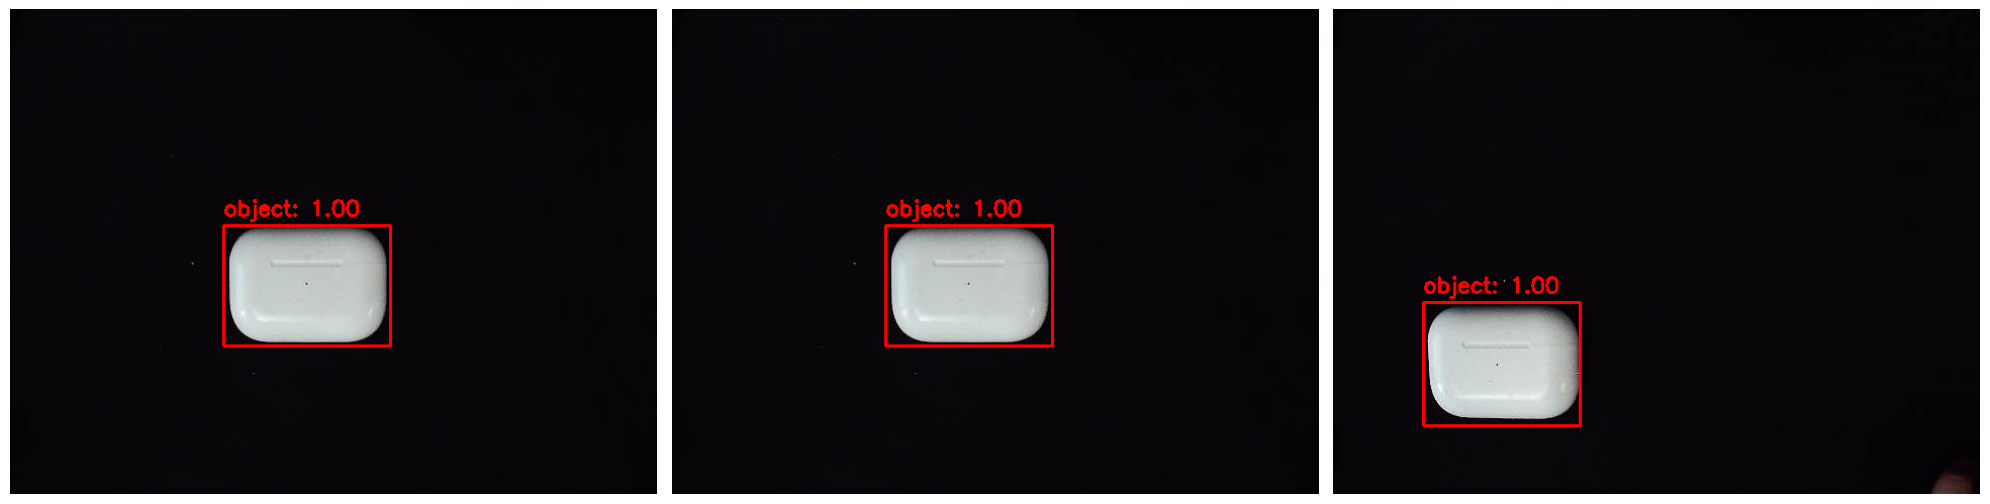

In [ ]:
import math

# Liczba obrazów do przetestowania
NUM_TEST_IMAGES = 3

# Pobieramy losowe indeksy ze zbioru walidacyjnego
test_indices = [random.randint(0, len(val_dataset) - 1) for _ in range(NUM_TEST_IMAGES)]
test_samples = [val_dataset[i] for i in test_indices]

# Ustawiamy model w tryb ewaluacji
model.eval()

# Przygotowujemy siatkę do wyświetlenia wyników
fig, axes = plt.subplots(1, NUM_TEST_IMAGES, figsize=(20, 10))
# Jeśli mamy tylko jeden obraz, axes nie jest listą, więc to naprawiamy
if NUM_TEST_IMAGES == 1:
    axes = [axes]

# Iterujemy przez wybrane próbki
for i, (img_tensor, _) in enumerate(test_samples):
    with torch.no_grad():
        # Dodajemy wymiar "batcha" i przenosimy na GPU
        prediction = model([img_tensor.to(device)])

    # Przenosimy wyniki na CPU
    pred_boxes = prediction[0]['boxes'].cpu().numpy()
    pred_scores = prediction[0]['scores'].cpu().numpy()
    pred_labels_idx = prediction[0]['labels'].cpu().numpy()

    # Konwertujemy obraz do formatu wyświetlania
    img_display = np.array(img_tensor.permute(1, 2, 0) * 255, dtype=np.uint8).copy()

    print(f"--- Obraz #{i+1} ---")
    found_object = False

    # Rysujemy ramki z pewnością powyżej progu
    CONFIDENCE_THRESHOLD = 0.5
    for j, box in enumerate(pred_boxes):
        score = pred_scores[j]
        if score > CONFIDENCE_THRESHOLD:
            found_object = True
            xmin, ymin, xmax, ymax = box.astype(int)
            label_idx = pred_labels_idx[j]
            label_name = CLASS_NAMES[label_idx]

            print(f"  Wykryto '{label_name}' z pewnością {score:.2f}")

            # Rysujemy ramkę (czerwony kolor)
            cv2.rectangle(img_display, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
            cv2.putText(img_display, f"{label_name}: {score:.2f}", (xmin, ymin - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    if not found_object:
        print("  Nie wykryto żadnego obiektu z wystarczającą pewnością.")

    # Wyświetlamy obraz na odpowiedniej pozycji w siatce
    axes[i].imshow(img_display)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# --- NOWOŚĆ: Upewniamy się, że biblioteka jest zainstalowana ---
!pip install torchmetrics -q

from torchmetrics.detection import MeanAveragePrecision
from pprint import pprint

# Ustawiamy metrykę. Będziemy używać standardowego protokołu COCO.
metric = MeanAveragePrecision(box_format='xyxy', class_metrics=True)

# Ustawiamy model w tryb ewaluacji
model.eval()

print("Rozpoczynam ewaluację na całym zbiorze walidacyjnym...")

with torch.no_grad():
    for images, targets in val_loader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        # Generujemy predykcje
        predictions = model(images)

        # Przenosimy predykcje i etykiety na CPU, bo metryki działają na CPU
        preds_cpu = [{k: v.cpu() for k, v in p.items()} for p in predictions]
        targets_cpu = [{k: v.cpu() for k, v in t.items()} for t in targets]

        # Aktualizujemy stan metryki o wyniki z tego batcha
        metric.update(preds_cpu, targets_cpu)

# Obliczamy finalne wyniki
print("\nObliczanie finalnych metryk...")
results = metric.compute()

print("\n--- Wyniki Ewaluacji (mAP) ---")
pprint(results)

# Wyciągamy najważniejszą wartość - mAP@50 (najpopularniejsza metryka)
map_50 = results['map_50'].item()
print(f"\nKluczowa metryka mAP@50: {map_50:.4f}")
if map_50 > 0.75:
    print("Wynik jest bardzo dobry! Model jest precyzyjny.")
elif map_50 > 0.5:
    print("Wynik jest dobry. Model działa poprawnie.")
else:
    print("Wynik jest niski. Model może wymagać dłuższego treningu, więcej danych lub tuningu hiperparametrów.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.7 MB/s eta 0:00:00
Rozpoczynam ewaluację na całym zbiorze wal